# <center>Text Analysis - Assignment 1<center>
<center>Created by Zsófia Rebeka Katona<center>
    

---

In this analysis, I explored the similarity between Senator Biden's speeches and those of other senators using cosine similarity. By preprocessing the text data and experimenting with techniques like stemming and lemmatization, I identified which senator's speech was closest to Biden's. I also created visualizations to support the analysis, and used predictive models to determine the party affiliation of senators based on their speeches. Finally, I summarized my findings in a Medium article, which you can find here:
https://medium.com/@zsofia.katona/biden-vs-senators-decoding-political-speeches-for-insights-138e91e62ea9

In [1]:
# Importing the required libraries for text analysis
import glob
import os
import re
import string
import nltk
import time
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer, SnowballStemmer, WordNetLemmatizer ,LancasterStemmer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize

# Importing the required libraries for predictions
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Vectorizing with Tfidf
tfidf_vectorizer = TfidfVectorizer()

## Extracting the speeches
---

In [2]:
# Defining the path to the speeches
path_pattern = 'C:\\Users\\Zsófi\\Documents\\CEU\\Winter\\Python-Programming\\Python-Programming-and-Text-Analysis\\Inputs/105-extracted-date'

# Creating a dictionary for senators and their speeches
speeches = {}

In [3]:
# Extracting the speeches and the senator names
for file_name in os.listdir(path_pattern):
    if file_name.endswith('.txt'):
        senator_name = file_name.replace('.txt', '')
        file_path = os.path.join(path_pattern, file_name)
        with open(file_path, 'r') as file:
            speech_content = file.read()
            speeches[senator_name] = speech_content
        
# Checking the the senator names
labels = list(speeches.keys())
labels[:5]

['105-abraham-mi',
 '105-akaka-hi',
 '105-allard-co',
 '105-ashcroft-mo',
 '105-baucus-mt']

In [4]:
# Defining the stop words from scikit learn's package
stop_words = list(ENGLISH_STOP_WORDS)

# Comparing the number of stop_words (before adding droplist)
len(stop_words)

318

### i) Use cosine similarity to determine which senator's speech is closest to Senator Biden's. Describe your findings. Make sure to describe your text preprocessing and justify your choices. Validate your findings using 'sen105kh_fix.csv' and/or Wikipedia to see if the most similar speeches belong to senators from the same state and/or party.


## Preprocessing the speeches
---

`Preprocessing only` in this context means converting the speeches to lowercase, removing the punctuations, tokenizing the words and removing the stop words.

In [5]:
# Defining the preprocess function to clean the texts
def preprocess_text(text):
    # Converting the text to lowercase
    text = text.lower()
    # Removing punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenizing the text into words
    tokens = [word for word in text.split() if word.isalpha() and word not in stop_words]
    # Joining the words into a single string
    return ' '.join(tokens)

In [6]:
# Starting the timer
start_time = time.time()

# Preprocessing the speeches
preprocessed_speeches = {senator: preprocess_text(speech) for senator, speech in speeches.items()}

# Calculating the elapsed time
elapsed_time = time.time() - start_time
print("Final process time:", round(elapsed_time, 2), "seconds.")

Final process time: 80.62 seconds.


In [7]:
# Initializing the Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fitting and transforming the preprocessed documents
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_speeches.values())

# Extracting Biden's speech for comparison
index_biden = list(preprocessed_speeches.keys()).index('105-biden-de')

In [8]:
# Performing the Bag of Words and putting it in a DataFrame
preprocessed_bow_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out()).T

# Displaying the Preprocessed Bag of Words
preprocessed_bow_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
aa,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000978,0.0,0.0,0.0,0.0
aaa,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
aaas,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
aaav,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
aaavthat,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zygmunt,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
zygote,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
zygotes,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.001311,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
zyuganov,0.0,0.0,0.0,0.0,0.0,0.0,0.004213,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


## Defining the function for cosine similarity
---

In [9]:
def cosine_similarity_comparison(tfidf_matrix):
    """
    Calculating cosine similarity between Senator Biden's speech and all other speeches in the given TF-IDF matrix.
    
    Parameters:
    - tfidf_matrix: TF-IDF matrix where rows represent speeches and columns represent terms.
    
    Returns:
    - cosine_similarities_flat: 1D array containing cosine similarity scores between Senator Biden's speech
      and all other speeches.
    """
    
    # Extracting Biden's speech
    biden_tfidf_vector = tfidf_matrix[index_biden]
    
    # Calculating cosine similarity between Senator Biden's text and all the other texts
    cosine_similarities = cosine_similarity(biden_tfidf_vector, tfidf_matrix)
    
    # Flattening the cosine similarities array
    cosine_similarities_flat = cosine_similarities.flatten()
    
    return cosine_similarities_flat

# Calculating and printing the cosine similarity scores
cosine_similarities = cosine_similarity_comparison(tfidf_matrix)

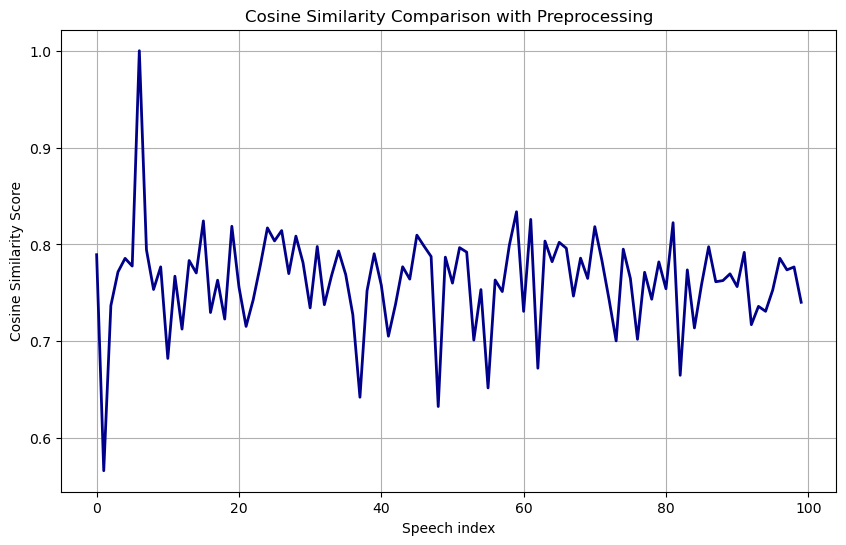

In [10]:
# Plotting the cosine similarity chart
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(len(cosine_similarities)), y=cosine_similarities, color='darkblue', linewidth=2)
plt.title('Cosine Similarity Comparison with Preprocessing')
plt.xlabel('Speech index')
plt.ylabel('Cosine Similarity Score')
plt.grid(True) 
plt.show()

In [11]:
# Initializing an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Speech Index', 'Senator', 'Cosine Similarity', 'Process Type'])

# Finding the indices and scores of the top 6 most similar texts
top_similarity_indices = cosine_similarities.argsort()[-6:][::-1]
top_similarity_scores = cosine_similarities[top_similarity_indices]

# Appending the indices, senator names, scores, and type to the results_df
for index, score in zip(top_similarity_indices, top_similarity_scores):
    senator_name = labels[index] if index < len(labels) else "Unknown"
    new_result = pd.DataFrame({'Speech Index': [index + 1],  # Adjusting for 0-based indexing
                               'Senator': [senator_name],
                               'Cosine Similarity': [score],
                               'Process Type': ['Preprocessing only']})
    results_df = pd.concat([results_df, new_result], ignore_index=True)

# Filtering out the rows where the Senator column equals "105-biden-de"
results_df = results_df[results_df['Senator'] != '105-biden-de']

In [12]:
results_df

,Speech Index,Senator,Cosine Similarity,Process Type
1,60,105-kerry-ma,0.833744,Preprocessing only
2,62,105-kyl-az,0.825815,Preprocessing only
3,16,105-byrd-wv,0.824255,Preprocessing only
4,82,105-roberts-ks,0.822444,Preprocessing only
5,20,105-coats-in,0.818734,Preprocessing only


## Lemmatizing
---

In [13]:
# Function to lemmatize text
def lemmatize_text(text):
    """
    Lemmatizing the speeches using WordNet lemmatization.
    
    Parameters:
    - text: Input text to be lemmatized.
    
    Returns:
    - lemmatized_text: Lemmatized text.
    """
    # Vectorizing with Tfidf
    tfidf_vectorizer = TfidfVectorizer()
    
    # Defining the lemmatizer function
    lemmatizer = WordNetLemmatizer()
    
    # Tokenizing the text
    words = nltk.word_tokenize(text)
    
    # Lemmatizing each word
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words if word.isalpha() and word not in stop_words]
    
    # Joining the lemmatized words into a single string
    return ' '.join(lemmatized_words)

In [66]:
# Starting the timer
start_time = time.time()

# Lemmatizing the speeches
lemmatized_speeches = {senator: lemmatize_text(speech) for senator, speech in speeches.items()}

# Calculating the elapsed time
elapsed_time = time.time() - start_time
print("Final process time:", round(elapsed_time, 2), "seconds.")

Final process time: 257.49 seconds.


In [15]:
# Fitting and transforming the preprocessed and lemmatized documents
tfidf_matrix_lem = tfidf_vectorizer.fit_transform(lemmatized_speeches.values())

# Extracting Biden's speech for comparison
index_biden = list(lemmatized_speeches.keys()).index('105-biden-de')

# Calculating the cosine similarity scores
cosine_similarities_lem = cosine_similarity_comparison(tfidf_matrix_lem)

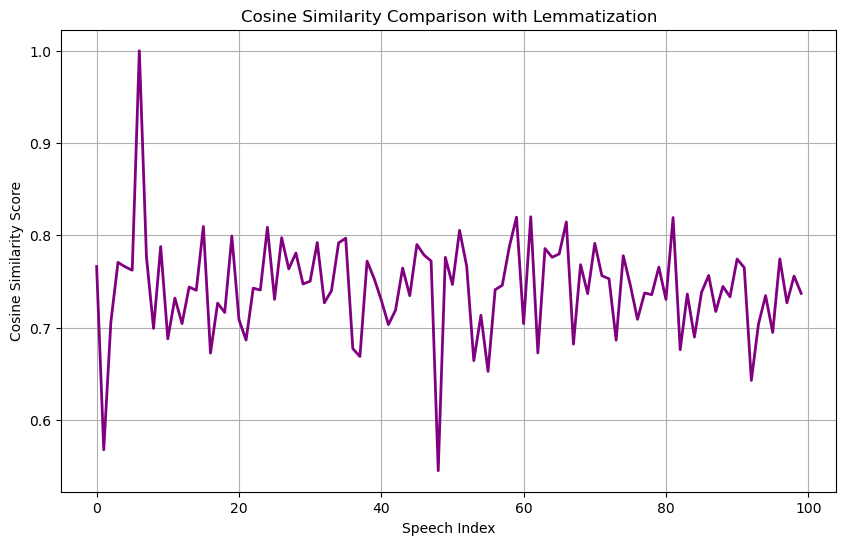

In [16]:
# Plotting the lemmatized cosine similarity scores
plt.figure(figsize=(10, 6))
plt.plot(range(len(cosine_similarities_lem)), cosine_similarities_lem, color='purple', linewidth=2)
plt.title('Cosine Similarity Comparison with Lemmatization')
plt.xlabel('Speech Index')
plt.ylabel('Cosine Similarity Score')
plt.grid(True)
plt.show()

In [17]:
# Finding the indices and scores of the top 6 most similar texts
top_similarity_indices_lem = cosine_similarities_lem.argsort()[-6:][::-1]
top_similarity_scores_lem = cosine_similarities_lem[top_similarity_indices_lem]

# Appending the indices, senator names, scores, and type to the results_df
for index, score in zip(top_similarity_indices_lem, top_similarity_scores_lem):
    senator_name = labels[index] if index < len(labels) else "Unknown"
    new_result_lem = pd.DataFrame({'Speech Index': [index + 1],  # Adjusting for 0-based indexing
                               'Senator': [senator_name],
                               'Cosine Similarity': [score],
                               'Process Type': ['Lemmatizing']})
    results_df = pd.concat([results_df, new_result_lem], ignore_index=True)
    
# Filtering out the rows where the Senator column equals "105-biden-de"
results_df = results_df[results_df['Senator'] != '105-biden-de']

In [18]:
results_df

,Speech Index,Senator,Cosine Similarity,Process Type
0,60,105-kerry-ma,0.833744,Preprocessing only
1,62,105-kyl-az,0.825815,Preprocessing only
2,16,105-byrd-wv,0.824255,Preprocessing only
3,82,105-roberts-ks,0.822444,Preprocessing only
4,20,105-coats-in,0.818734,Preprocessing only
6,62,105-kyl-az,0.820091,Lemmatizing
7,60,105-kerry-ma,0.819682,Lemmatizing
8,82,105-roberts-ks,0.819224,Lemmatizing
9,67,105-lieberman-ct,0.814449,Lemmatizing
10,16,105-byrd-wv,0.809600,Lemmatizing


## Stemming
---

In [19]:
# Defining the stemmer function
def stemm_text(text):
    """
    Applying stemming to the speeches using Lancaster stemming.
    
    Parameters:
    - text: Input text to be stemmed.
    
    Returns:
    - stemmed_text: Stemmed text.
    """
    # Vectorizing with Tfidf
    tfidf_vectorizer = TfidfVectorizer()
    
    # Initializing the stemmer
    stemmer = LancasterStemmer()
    
    # Tokenizing the text
    words = nltk.word_tokenize(text)
    
    # Stemming each word
    stemmed_words = [stemmer.stem(word) for word in words if word.isalpha() and word not in stop_words]
    
    # Joining the stemmed words into a single string
    return ' '.join(stemmed_words)

In [20]:
# Starting the timer
start_time = time.time()

# Stemming the speeches
stemmed_speeches = {senator: stemm_text(speech) for senator, speech in speeches.items()}

# Calculating the elapsed time
elapsed_time = time.time() - start_time
print("Final process time:", round(elapsed_time, 2), "seconds.")

Final process time: 413.75 seconds.


In [21]:
# Fitting and transforming the preprocessed and stemmed documents
tfidf_matrix_stem = tfidf_vectorizer.fit_transform(stemmed_speeches.values())

# Extracting Biden's speech for comparison
index_biden = list(lemmatized_speeches.keys()).index('105-biden-de')

# Calculating the cosine similarity scores
cosine_similarities_stem = cosine_similarity_comparison(tfidf_matrix_stem)

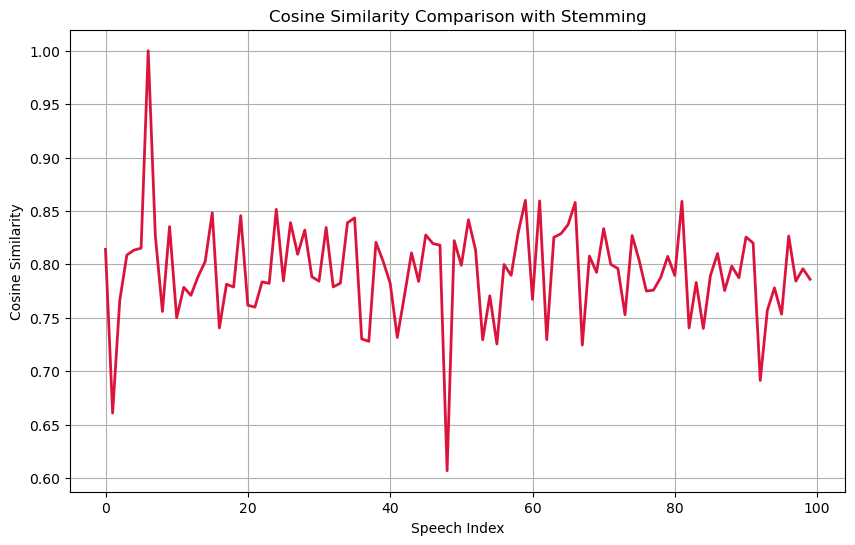

In [22]:
# Plotting the chart for stemming
plt.figure(figsize=(10, 6))
plt.plot(range(len(cosine_similarities_stem)), cosine_similarities_stem, color='crimson', linewidth=2)
plt.title('Cosine Similarity Comparison with Stemming')
plt.xlabel('Speech Index')
plt.ylabel('Cosine Similarity')
plt.grid(True)
plt.show()

In [23]:
# Finding the indices and scores of the top 6 most similar texts
top_similarity_indices_stem = cosine_similarities_stem.argsort()[-6:][::-1]
top_similarity_scores_stem = cosine_similarities_stem[top_similarity_indices_stem]

# Appending the indices, senator names, scores, and type to the results_df
for index, score in zip(top_similarity_indices_stem, top_similarity_scores_stem):
    senator_name = labels[index] if index < len(labels) else "Unknown"
    new_result_stem = pd.DataFrame({'Speech Index': [index + 1],  # Adjusting for 0-based indexing
                               'Senator': [senator_name],
                               'Cosine Similarity': [score],
                               'Process Type': ['Stemming']})
    results_df = pd.concat([results_df, new_result_stem], ignore_index=True)
    
# Filtering out the rows where the Senator column equals "105-biden-de"
results_df = results_df[results_df['Senator'] != '105-biden-de']

# Reordering the results_df by the highest cosine similarity scores
results_df = results_df.sort_values(by='Cosine Similarity', ascending=False)

In [24]:
results_df

,Speech Index,Senator,Cosine Similarity,Process Type
11,60,105-kerry-ma,0.859975,Stemming
12,62,105-kyl-az,0.859376,Stemming
13,82,105-roberts-ks,0.859033,Stemming
14,67,105-lieberman-ct,0.858016,Stemming
15,25,105-craig-id,0.851537,Stemming
0,60,105-kerry-ma,0.833744,Preprocessing only
1,62,105-kyl-az,0.825815,Preprocessing only
2,16,105-byrd-wv,0.824255,Preprocessing only
3,82,105-roberts-ks,0.822444,Preprocessing only
5,62,105-kyl-az,0.820091,Lemmatizing


## Some words about the senators
---
Considering all text processing techniques, the senator with the most similar speeches to Biden's is John Kerry. John Kerry (born in 1943) is an American attorney, politician and diplomat. He formerly represented Massachusetts as a Senator. He currently serves as the first U.S. Special Presidential Envoy for Climate from 2021 until 2024. He was the 68th United States secretary of state from 2013 to 2017, during Barack Obama's presidency. He is a member of the Democratic Party. Interesting fact is that he was nominated for president of the United States by the Democrats in the 2004 election, but he lost to George W. Bush. [[1]]("https://en.wikipedia.org/wiki/John_Kerry")

Jon Kyl (born in 1942) served as a Senator for Arizona from 1995 to 2013. His stemmed speeches scores as second and his preprocessed and lemmatized texts are scored as the closest to president Biden's speeches. Kyl was a Republican Senator. In 2006, he was recognized as [one of America's Ten Best Senators]("https://web.archive.org/web/20170727060059/http://content.time.com/time/nation/article/0,8599,1183960,00.html"). Kyl resigned from the Senate in 2018. [[2]]("https://en.wikipedia.org/wiki/Jon_Kyl")

Charles Patrick Roberts (born in 1936) is a retired politician and journalist. He served as a United States senator from Kansas from 1997 to 2021. In all text processing techniques, he ranks as the third in speech similarity. He began his career as a newspaper reporter before he became a politician in the 1960s. Roberts, as a member of the Republican party, held office for eight terms in the U.S. House of Representatives, serving from 1981 to 1997, before transitioning to the Senate. He left his role as senator on January 3, 2021. [[3]]("https://en.wikipedia.org/wiki/Pat_Roberts")

The last senator, whose speeches are scored as the closest in all text processing types, is Joe Lieberman. He was born in 1942, and he served as a senator from Connecticut from 1989 to 2013. A former member of the Democratic party. As a senator, he attested the Don't Ask, Don't Tell Repeal Act of 2010, which led to the creation of the Department of Homeland Security. [[4]]("https://en.wikipedia.org/wiki/Joe_Lieberman")

Joseph Robinette Biden Jr., the 46th and current President of the United States. He previously served as the vice president under Barack Obama from 2009 to 2017. As a member of the Democratic Party, he represented Delaware in the United States Senate from 1973 to 2009. [[5]]("https://en.wikipedia.org/wiki/Joe_Biden") Among the senators with most similar speeches to Biden's, we can conclude from `sen105kh_fix` that only Kerry, Lieberman, Byrd are/were members of the same party. The states represented by the senators in the list are Massachusetts, Arizona, Kansas, Connecticut, Idaho, and Texas, therefore there are no similarities in terms of states.

### ii) Stemming or Lemmatization?
---

| Senator        | Cosine Similarity Score | Process Type     |
|----------------|-------------------|------------------|
| 105-kerry-ma   | 0.859975          | Stemming         |
| 105-kyl-az     | 0.859376          | Stemming         |
| 105-roberts-ks | 0.859033          | Stemming         |
| 105-lieberman-ct| 0.858016         | Stemming         |
| 105-craig-id   | 0.851537          | Stemming         |
| 105-kerry-ma   | 0.833744          | Preprocessing only|
| 105-kyl-az     | 0.825815          | Preprocessing only|
| 105-byrd-wv    | 0.824255          | Preprocessing only|
| 105-roberts-ks | 0.822444          | Preprocessing only|
| 105-kyl-az     | 0.820091          | Lemmatizing      |
| 105-kerry-ma   | 0.819682          | Lemmatizing      |
| 105-roberts-ks | 0.819224          | Lemmatizing      |
| 105-coats-in   | 0.818734          | Preprocessing only|
| 105-lieberman-ct| 0.814449         | Lemmatizing      |
| 105-byrd-wv    | 0.809600          | Lemmatizing      |


According to the table, preprocessing and stemming overperforms the lemmatizing, suggesting that these methods contribute to the highest cosine similarity scores. Based on the `results_df`, we can see that all of the highlighted stemmed cosine similarity scores consistently overranked the other text processing techniques. While preprocessing improves the preprocessed scores by 1-2 integers, stemming can increase the sentiment scores by even 5-6 integers in this context. This is interesting from another point of view, as well: Lemmatizing lasted about 2.5x more than preprocessing only. Especially, in the case of preprocessing larger text data, we should ask ourselves the question if it's worth to wait more if it produces weaker values than preprocessing only.  

According to the stemming and preprocessing scores only, the speeches of Senator Kerry appeared to be the closest to president Biden's speeches. According to lemmatizing, his speeches only rank second in resemblance to those of the current president. John Kyl claimed the first place in similarity in terms of lemmatizing. Kyl's stemmed and preprocessed speeches scored as second. Senator Roberts ranks third in similarity to Biden's speeches when using lemmatization and stemming, while Senator Lieberman ranks fourth. Interesting fact is that while Byrd is in the end of the list considering lemmatizing, his speeches appear to be more similar when the texts are preprocessed only.

It is imperative to consider the scores from a broader perspective. All the top values range from 0.80 to 0.86, indicating a relatively high degree of similarity between the speeches. This could mean that there is a relatively high overlap in the content and rhetorical themes of these senators. We could assume that besides the content, the language, these senators may share in their policy positions with those of president Biden's. At the same time, we have to bear in mind that cosine similarity scores are relative and they should be interpreted within the specific context of the analysis. 

The results show unequivocal evidence that stemming outperforms lemmatizing with considerable difference. Hence, we can conclude that stemming is more effective in text comparison than lemmatizing and preprocessing only. In my opinion, I would use stemming as it yields better results, however lemmatizing can be more strict in slicing words and grouping them together, leading to a better conclusion in a certain context.

### iii) Create at least two visualizations to support your analysis.

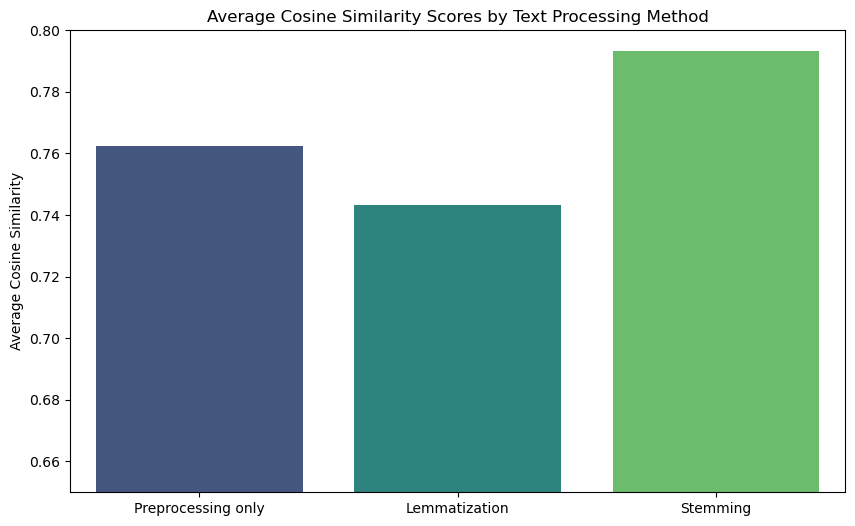

In [25]:
# Visualizing the average cosine similarity scores 

# Calculating the average cosine similarity scores
avg_similarity = np.mean(cosine_similarities)
avg_similarity_lem = np.mean(cosine_similarities_lem)
avg_similarity_stem = np.mean(cosine_similarities_stem)

# Creating a dictionary to plot
data = {
    'Method': ['Preprocessing only', 'Lemmatization', 'Stemming'],
    'Average Cosine Similarity': [avg_similarity, avg_similarity_lem, avg_similarity_stem]
}
visualizations_df = pd.DataFrame(data)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=visualizations_df, x='Method', y='Average Cosine Similarity', palette='viridis')
plt.ylim(0.65, 0.8)
plt.title('Average Cosine Similarity Scores by Text Processing Method')
plt.xlabel('')
plt.ylabel('Average Cosine Similarity')
plt.show()

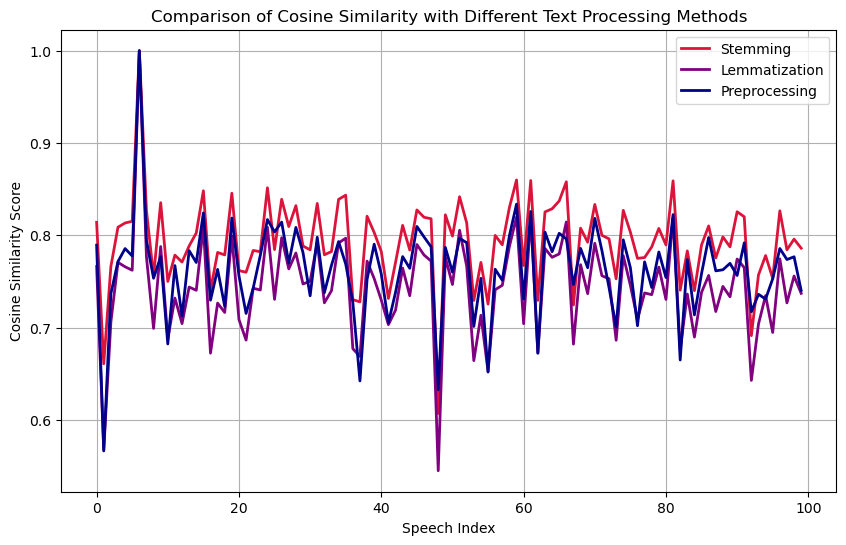

In [26]:
# Visualizing each method's cosine similarity score on one chart
plt.figure(figsize=(10, 6))
# Plot the chart for stemming
plt.plot(range(len(cosine_similarities_stem)), cosine_similarities_stem, color='crimson', linewidth=2, label='Stemming')

# Plot the lemmatized cosine similarity scores
plt.plot(range(len(cosine_similarities_lem)), cosine_similarities_lem, color='purple', linewidth=2, label='Lemmatization')

# Plot the cosine similarity chart
sns.lineplot(x=range(len(cosine_similarities)), y=cosine_similarities, color='darkblue', linewidth=2, label='Preprocessing')

# Set titles and labels
plt.title('Comparison of Cosine Similarity with Different Text Processing Methods')
plt.xlabel('Speech Index')
plt.ylabel('Cosine Similarity Score')
plt.grid(True)
plt.legend()
plt.show()

### iv) Use 'sen105kh_fix.csv' as the target variable for your predictions. Can you predict the party of the senator from their speech? Should you use the same text preprocessing as above? Justify your choices.

In [74]:
# Importing the sen105kh_fix.csv
sen105_df = pd.read_csv("https://raw.githubusercontent.com/ariedamuco/Python-Programming-and-Text-Analysis/master/Inputs/sen105kh_fix.csv", sep=';')

# Create the new column by concatenating 'cong', 'lname', and 'stateab' columns
sen105_df['speech_index'] = sen105_df['cong'].astype(str) + '-' + sen105_df['lname'] + '-' + sen105_df['stateab']

In [75]:
# Reordering the DataFrame by senator names in alphabetic order
sen105_df = sen105_df.sort_values(by='lname').reset_index(drop=True)
sen105_df

,cong,lname,stateab,lstate,id,dist,party,speech_index
0,105,abraham,mi,MICHIGA,49500,0,200,105-abraham-mi
1,105,akaka,hi,HAWAII,14400,0,100,105-akaka-hi
2,105,allard,co,COLORAD,29108,0,200,105-allard-co
3,105,ashcroft,mo,MISSOUR,49501,0,200,105-ashcroft-mo
4,105,baucus,mt,MONTANA,14203,0,100,105-baucus-mt
...,...,...,...,...,...,...,...,...
95,105,thurmond,sc,SOUTH C,9369,0,200,105-thurmond-sc
96,105,torricelli,nj,NEW JER,15071,0,100,105-torricelli-nj
97,105,warner,va,VIRGINI,14712,0,200,105-warner-va
98,105,wellstone,mn,MINNESO,49101,0,100,105-wellstone-mn


### Logistic Regression Classifier
---

In [71]:
# Converting text data into numerical features using TF-IDF for preprocessed speeches
tfidf_vectorizer_preprocessed = TfidfVectorizer()
X_preprocessed = tfidf_vectorizer_preprocessed.fit_transform(preprocessed_speeches.values())

# Converting text data into numerical features using TF-IDF for lemmatized speeches
tfidf_vectorizer_lemmatized = TfidfVectorizer()
X_lemmatized = tfidf_vectorizer_lemmatized.fit_transform(lemmatized_speeches.values())

# Converting text data into numerical features using TF-IDF for stemmed speeches
tfidf_vectorizer_stemmed = TfidfVectorizer()
X_stemmed = tfidf_vectorizer_stemmed.fit_transform(stemmed_speeches.values())

# Defining the target variable
y = sen105_df['party']

# Initializing Logistic Regression classifier
classifier = LogisticRegression(max_iter=1000)

# Defining a function for the different speeches
def predict_and_print_report(X, y, classifier):
    
    # Splitting the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 20240324)

    # Training the model
    classifier.fit(X_train, y_train)

    # Evlauting the model by computing the accuracy and calling the classification report
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# Printing the results (Preprocessing Only)
print("Classification Report for TF-IDF Matrix (Preprocessing Only):")
predict_and_print_report(X_preprocessed, y, classifier)

# Printing the results (Lemmatization)
print("\nClassification Report for TF-IDF Matrix with Lemmatization:")
predict_and_print_report(X_lemmatized, y, classifier)

# Printing the results (Stemming)
print("\nClassification Report for TF-IDF Matrix with Stemming:")
predict_and_print_report(X_stemmed, y, classifier)

Classification Report for TF-IDF Matrix (Preprocessing Only):
Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

         100       0.80      0.57      0.67         7
         200       0.80      0.92      0.86        13

    accuracy                           0.80        20
   macro avg       0.80      0.75      0.76        20
weighted avg       0.80      0.80      0.79        20


Classification Report for TF-IDF Matrix with Lemmatization:
Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

         100       1.00      0.57      0.73         7
         200       0.81      1.00      0.90        13

    accuracy                           0.85        20
   macro avg       0.91      0.79      0.81        20
weighted avg       0.88      0.85      0.84        20


Classification Report for TF-IDF Matrix with Stemming:
Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   suppo

### Interpretation of the Logistic Regression model
---

In the first classification report, which corresponds to preprocessing only, the model achieved an accuracy of 80%. There was a 80% precision to predict whether a senator is a member of the Democratic Party. This percentage was 80% to predict whether senators belong to the Republican party. The recall and the F1-scores also confirmed that this model performed better on predicting Republican affiliation.

In the second classification report, which corresponds to lemmatization, the accuracy improved to 85%. For the Democratic class, the precision is 100%, and the recall and F1-scores are also higher compared to the previous report. While the precision for the Republican class is 81%, the recall is 100%, and the F1-score corresponds to 90%, indicating an overall better performance than the preprocessing-only model.

The accuracy for the stemming matrix also improved to 85%. For class 100, the precision is 100% with higher recall and F1-score compared to the lemmatization scenario. For the Republican class, the precision is 81% with a 100% recall and 90% F1-score, indicating a balanced performance.

Overall, the models perform reasonably well in predicting whether a senator is Republican or not in all scenarios. The choice of text processing technique seems to have some impact on the model's performance, with lemmatization and stemming showing improvements compared to preprocessing only. However, the models could still be further refined, especially in terms of predicting Democratic affiliations.


### Naive Bayes Classifier
---

In [72]:
# Converting text data into numerical features using TF-IDF for preprocessed speeches
tfidf_vectorizer_preprocessed = TfidfVectorizer()
X_preprocessed = tfidf_vectorizer_preprocessed.fit_transform(preprocessed_speeches.values())

# Converting text data into numerical features using TF-IDF for lemmatized speeches
tfidf_vectorizer_lemmatized = TfidfVectorizer()
X_lemmatized = tfidf_vectorizer_lemmatized.fit_transform(lemmatized_speeches.values())

# Converting text data into numerical features using TF-IDF for stemmed speeches
tfidf_vectorizer_stemmed = TfidfVectorizer()
X_stemmed = tfidf_vectorizer_stemmed.fit_transform(stemmed_speeches.values())

# Defining the target variable
y = sen105_df['party']

# Initializing Logistic Regression classifier
classifier_nb = LogisticRegression(max_iter=1000)

# Defining a function for the different speeches
def predict_and_print_report(X, y, classifier):
    
    # Splitting the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 20240324)

    # Training the model
    classifier.fit(X_train, y_train)

    # Evlauting the model by computing the accuracy and calling the classification report
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# Printing the results (Preprocessing Only)
print("Classification Report for TF-IDF Matrix (Preprocessing Only):")
predict_and_print_report(X_preprocessed, y, classifier_nb)

# Printing the results (Lemmatization)
print("\nClassification Report for TF-IDF Matrix with Lemmatization:")
predict_and_print_report(X_lemmatized, y, classifier_nb)

# Printing the results (Stemming)
print("\nClassification Report for TF-IDF Matrix with Stemming:")
predict_and_print_report(X_stemmed, y, classifier_nb)

Classification Report for TF-IDF Matrix (Preprocessing Only):
Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

         100       0.80      0.57      0.67         7
         200       0.80      0.92      0.86        13

    accuracy                           0.80        20
   macro avg       0.80      0.75      0.76        20
weighted avg       0.80      0.80      0.79        20


Classification Report for TF-IDF Matrix with Lemmatization:
Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

         100       1.00      0.57      0.73         7
         200       0.81      1.00      0.90        13

    accuracy                           0.85        20
   macro avg       0.91      0.79      0.81        20
weighted avg       0.88      0.85      0.84        20


Classification Report for TF-IDF Matrix with Stemming:
Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   suppo

### Interpretation of the Naive Bayes models
---

The first Naive Bayes classification report with preprocessing only shows a 80% accuracy in prediction. While the precision for the Democratic instances is 80%, indicating a decent proportion of correct predictions within the class, the recall and the F1-scores suggest that some of the actual class 100 instances were missed. The model performs well in predicting class 200 with a 92% precision.

Similarly, the accuracy of the matrix with lemmatization improved to 85%. For class 100, the precision is 100%, indicating all predictions within this class are correct, but the recall and F1-scores suggest that not all instances of class 100 were captured. However, for class 200, both precision and recall are high, resulting in a balanced F1-score.

Following the pattern of logistic regression, the accuracy for the matrix with stemming also increased to 85%. The prediction of class 100 remains at 100%, but with a higher recall and F1-score compared to lemmatization. For class 200, the precision is 81% with a recall of 100%.

In summary, the Naive Bayes models show similar trends to the logistic regression model, where Republican senators are being predicted more accurately than class 100 instances. Stemming has the best impact on the model's performance, but there is still room for improvement, especially in capturing all instances of Democratic affiliations.
